# Comparison of estimation algorithms

In [2]:
%pylab inline
import pandas as pd
import numpy as np

from matplotlib import rc
rc('font', family='sans-serif')
rc('font', size=10.0)
rc('text', usetex=False)

from matplotlib.font_manager import FontProperties
panel_label_font = FontProperties().copy()
panel_label_font.set_weight("bold")
panel_label_font.set_size(12.0)
panel_label_font.set_family("sans-serif")



Populating the interactive namespace from numpy and matplotlib


/Users/Merryous/Desktop/Transferarbeit III/Predicting Ethereum gas price/Analysis/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['rc']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


,block_number,priceStandard,scoreStandardPlus1,scoreStandardPlus2,scoreStandardPlus3,scoreStandardPlus4,scoreStandardPlus5,scoreStandardPlus6,scoreStandardPlus7,scoreStandardPlus8,scoreStandardPlus9,scoreStandardPlus10
0,7003481,3000000000,100.000,100.000,100.000,54.545,99.387,62.733,100.000,55.696,80.153,56.311
1,7003582,3000000000,100.000,94.944,36.190,21.918,5.000,100.000,14.483,100.000,76.159,76.821
2,7003742,4000100100,53.691,73.684,34.074,89.809,42.657,100.000,100.000,100.000,97.861,23.148
3,7003764,3000000000,24.342,68.421,100.000,67.808,80.000,68.235,65.333,100.000,55.034,55.357
4,7003453,2000000000,89.076,34.545,100.000,100.000,100.000,100.000,96.241,52.830,100.000,98.286
5,7003601,3000000000,100.000,74.566,100.000,62.963,84.058,100.000,61.538,63.492,31.163,89.535
6,7003910,2000000000,65.254,100.000,69.231,100.000,87.671,100.000,100.000,26.042,33.628,100.000
7,7003631,3000000000,74.324,100.000,100.000,100.000,100.000,100.000,98.734,89.062,22.018,54.545
8,7003991,10000000000,44.393,59.036,92.857,51.592,45.783,31.373,100.000,100.000,85.603,69.307
9,7003457,3000000000,100.000,66.935,76.692,40.566,92.500,98.286,34.615,100.000,51.064,100.000


In [6]:
dfnaive = pd.read_csv('data/naivescores2019-01-03T1641.csv')
dfexpress = pd.read_csv('data/expressscores2019-01-03T1641.csv')
dfweb3 = pd.read_csv('data/web3jscores2019-01-03T1641.csv')

In [8]:
dfnaive = dfnaive.replace(-1.00, np.nan)
dfnaive = dfnaive.sort_values(by=['block_number']) 

dfexpress = dfexpress.replace(-1.00, np.nan)
dfexpress = dfexpress.sort_values(by=['block_number']) 

dfweb3 = dfweb3.replace(-1.00, np.nan)
dfweb3 = dfweb3.sort_values(by=['block_number']) 

def stats(df):
    df['priceGwei'] = df['priceStandard'].apply(lambda x: x/1e9)
    avg_percentage1 = df["scoreStandardPlus1"].mean()
    avg_gasprice = df["priceGwei"].mean()
    std_percentage1 = df["scoreStandardPlus1"].std()
    std_gasprice = df["priceGwei"].std()
    min_gasprice = df["priceGwei"].min()
    max_gasprice = df["priceGwei"].max()
    print("min price: " + str(min_gasprice))
    print("max price: " + str(max_gasprice))
    print("The average gas price is: " + str(avg_gasprice) + " GWei. std: " + str(std_gasprice))
    print("On average " +  str(avg_percentage1) +"% of the transactions of the next block had a higher gas price. std: " + str(std_percentage1))

print("\n############### naive ###################")
stats(dfnaive)

print("\n############### express ###################")
stats(dfexpress)

print("\n############### web3 ###################")
stats(dfweb3)



############### naive ###################
min price: 2.0
max price: 11.0
The average gas price is: 4.247490648328032 GWei. std: 2.3065578222561998
On average 70.39942629482073% of the transactions of the next block had a higher gas price. std: 28.64795139501747

############### express ###################
min price: 3.0
max price: 3.0
The average gas price is: 3.0 GWei. std: 0.0
On average 76.21570196078432% of the transactions of the next block had a higher gas price. std: 26.478479464127393

############### web3 ###################
min price: 1.0
max price: 2.793296105
The average gas price is: 1.484692461379175 GWei. std: 0.465419484527748
On average 92.25866797642435% of the transactions of the next block had a higher gas price. std: 17.917099925213748


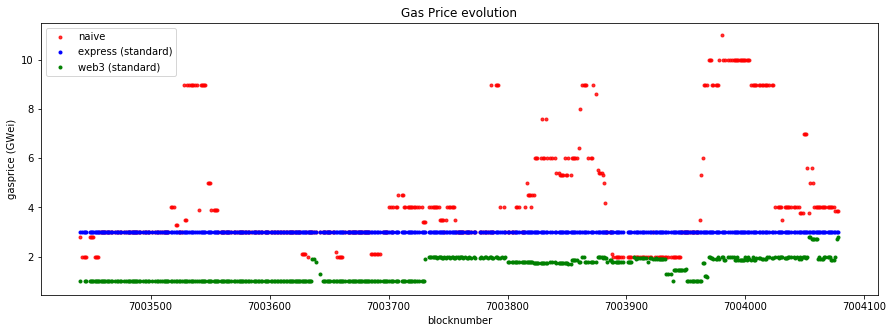

In [10]:
import matplotlib.pyplot as plt

x1 = dfnaive["block_number"].values
y1 = dfnaive["priceGwei"].values

x2 = dfexpress["block_number"].values
y2 = dfexpress["priceGwei"].values

x3 = dfweb3["block_number"].values
y3 = dfweb3["priceGwei"].values

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

ax.scatter(x1, y1, alpha=0.8, c='r', marker='.', label='naive')
ax.scatter(x2,y2, c='b', marker='.', label='express (standard)')
ax.scatter(x3,y3, c='g',marker='.', label='web3 (standard)')

plt.xlabel('blocknumber')
plt.ylabel('gasprice (GWei)')
plt.title('Gas Price evolution')
plt.legend(loc=2)

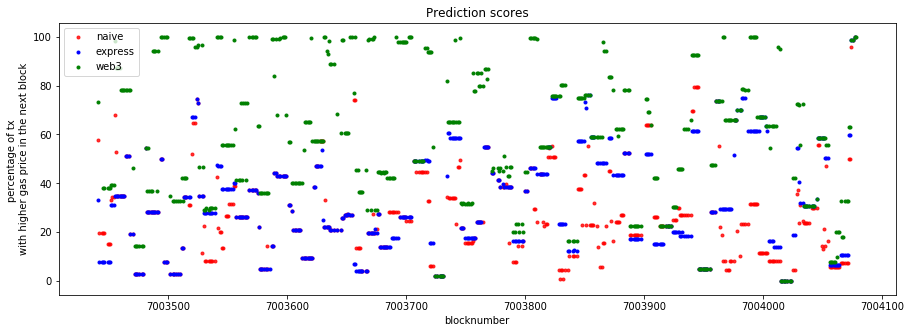

In [16]:
import matplotlib.pyplot as plt

dfnaive['nextMin'] = dfnaive[["scoreStandardPlus1", "scoreStandardPlus2", "scoreStandardPlus3", "scoreStandardPlus4", "scoreStandardPlus5", "scoreStandardPlus6", "scoreStandardPlus7", "scoreStandardPlus8", "scoreStandardPlus9", "scoreStandardPlus10"]].min(axis=1)
x1 = dfnaive["block_number"].values
y1 = dfnaive["nextMin"].values

dfexpress['nextMin'] = dfexpress[["scoreStandardPlus1", "scoreStandardPlus2", "scoreStandardPlus3", "scoreStandardPlus4", "scoreStandardPlus5", "scoreStandardPlus6", "scoreStandardPlus7", "scoreStandardPlus8", "scoreStandardPlus9", "scoreStandardPlus10"]].min(axis=1)
x2 = dfexpress["block_number"].values
y2 = dfexpress["nextMin"].values

dfweb3['nextMin'] = dfweb3[["scoreStandardPlus1", "scoreStandardPlus2", "scoreStandardPlus3", "scoreStandardPlus4", "scoreStandardPlus5", "scoreStandardPlus6", "scoreStandardPlus7", "scoreStandardPlus8", "scoreStandardPlus9", "scoreStandardPlus10"]].min(axis=1)
x3 = dfweb3["block_number"].values
y3 = dfweb3["nextMin"].values

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

ax.scatter(x1, y1, alpha=0.8, c='r', marker='.', label='naive')
ax.scatter(x2,y2, c='b', marker='.', label='express')
ax.scatter(x3,y3, c='g',marker='.', label='web3')

plt.xlabel('blocknumber')
plt.ylabel('percentage of tx \nwith higher gas price in the next block')
plt.title('Prediction scores')
plt.legend(loc=2)

In [24]:
naiveMean = dfnaive["priceGwei"].mean()
expressMean = dfexpress["priceGwei"].mean()
web3Mean = dfweb3["priceGwei"].mean()

toDollar = 145.13 / 1000000000 #1 ETH = 145.13, 3.01.2019 20:00
print(toDollar)
diff = naiveMean - expressMean
diff1 = naiveMean - web3Mean
print('{0:.10f}'.format(diff * toDollar) + "$")
print('{0:.10f}'.format(diff1 * toDollar) + "$")

1.4513e-07
0.0000001810$
0.0000004010$


on average over 500 blocks a total of 0.0000001810 dollar could be saved per 1 Gwei
using express estimation instead of naive estimation
for a standard transaction this would be (fee = gaslimit * gasprice)

21000 * 0.0000001810 = 0.0038 dollar

using web3 estimation instead of naive estimation
for a standard transaction this would be (fee = gaslimit * gasprice)

21000 * 0.0000004010 = 0.0084 dollar

this suggests that most users do not even rely on a naive estimation but just type in some value.